# Guided Project: Investigating Fandango Movie Ratings
Synopsis:
Fandango is a movie rating aggregator. In 2015 a report was published indicating movie ratings on Fandango's site are inflated. Fandango uses a rating system based on stars, with zero stars being the lowest score and five being the highest score. The results of the report showed that most movie ratings were rounded up to the nearest half-star. After the report was published, Fandango accounted for the issue claiming it was a bug on their site and made promises to fix it. In this project we are going to examine more recent movie ratings data to determine where there has been any change in Fandango's rating system.

## Getting the data
For this guided project we're going to use two sets of data. One set comes from the data used to publish the original Fandango report. This is going to help us establish the baseline. We will be able to recreate the analysis. Secondly we'll be using dataset collected by a team member from Dataquest on movie ratings data from multiple ratings sites (including Fandango) for movies rated in 2016-2017. This dataset will give us additional information to answer our question: Did Fandango update their rating system?

In [182]:
import pandas as pd

fandango = pd.read_csv("csv/fandango_score_comparison.csv")
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [183]:
ratings16 = pd.read_csv("csv/movie_ratings_16_17.csv")
ratings16.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [184]:
fandango_old = fandango[['FILM','Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_old.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [185]:
fandango_new = ratings16[['movie', 'year', 'fandango']].copy()
fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [186]:
fandango_old.shape

(146, 5)

In [187]:
fandango_new.shape

(214, 3)

Our goal is to determine if Fandango updated their ratings system after the report was published. The population that we need to sample from occurs at two different time periods. Most importantly, the starting population would be the ratings of all movies on Fandango's site. 

We do have information from Fandango's site from 2015. It lists 146 movies. In comparison we also have data from 2016 of Fandango ratings. It lists 214 movies. 

According to the article the 2015 data used to investigate Fandango's ratings the data criterion were:
- Movies that had tickets sold on the Fandango site
- Movies that had more than 30 reviews

Some issues here are that there could be movies that did not have ticket sales on the website, there are movies who were excluded from the dataset because they did not have enough reviews.

Similarly, the second data set of movies from 2016-2017 has interesting notes:
- movies were included if they have a 'significant' amount of votes

It isn't clear what a significant amount of votes is but more importantly, it confirms that movies were excluded from the sample--it is not random.

When we compare these two samples to the desired population of all movies, it would appear we have an unrepresentative sample size to make reasonable conclusions. The samples were not collected at random (each had specific criterion for their inclusion).

As a result of the unrepresentative samples needed to answer our original question we can either get more data, or tweak the goal of our question. We are going to go with the latter. 

One commonality between the data sets is that they each included movies that received 'significant' votes or reviews. In this way we can ask a similar question: was there a change in Fandango's system but it will be limited in scope to movies that recieved reviews/votes. This means any conclusions drawn here will not be applicable to the larger population and only an indication of any possible trends, not a confirmation of one.

### Reviewing the DataSets for popular movies
We need to make sure that each datset from 2015 and 2016 have enough reviews (>=30) in order for us to compare the overall ratings.

In [188]:
fandango_old.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [189]:
fandango_new.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


A quick review of the columns in our datasets show that comparing votes between datasets is not a realistic option. Although the dataset representing movies from 2016-2017 was limited to movies that received at least 30 votes, we don't know the scale of the votes. This is problematic as the votes for the 2015 movies are on the ratio scale.

There is another issue as well. There are movies in the 2016-2017 dataset released after 2016. We want to do a year over year comparison knowing that the change to the site was implemented between 2015 and 2016. We also will want to isolate our datasets so one is representative of movies from 2015 and the other is representative of movies in 2016.

In [190]:
fandango_old = fandango_old[fandango_old['Fandango_votes'] >=30]
fandango_old.shape

(146, 5)

check to make sure all videos in the 'old' dataset are from 2015

In [191]:
fandango_2015 = fandango_old[fandango_old['FILM'].str.contains("2015", case=False)]

In [192]:
fandango_2015.shape

(129, 5)

Let's get the data sorted for the fandango new dataset

In [193]:
fandango_2016 = fandango_new[fandango_new['year'] == 2016]

In [194]:
fandango_2016['year'].unique

<bound method Series.unique of 0      2016
1      2016
2      2016
4      2016
5      2016
       ... 
207    2016
208    2016
209    2016
212    2016
213    2016
Name: year, Length: 191, dtype: int64>

### Comparing the Distributions between 2015 and 2016

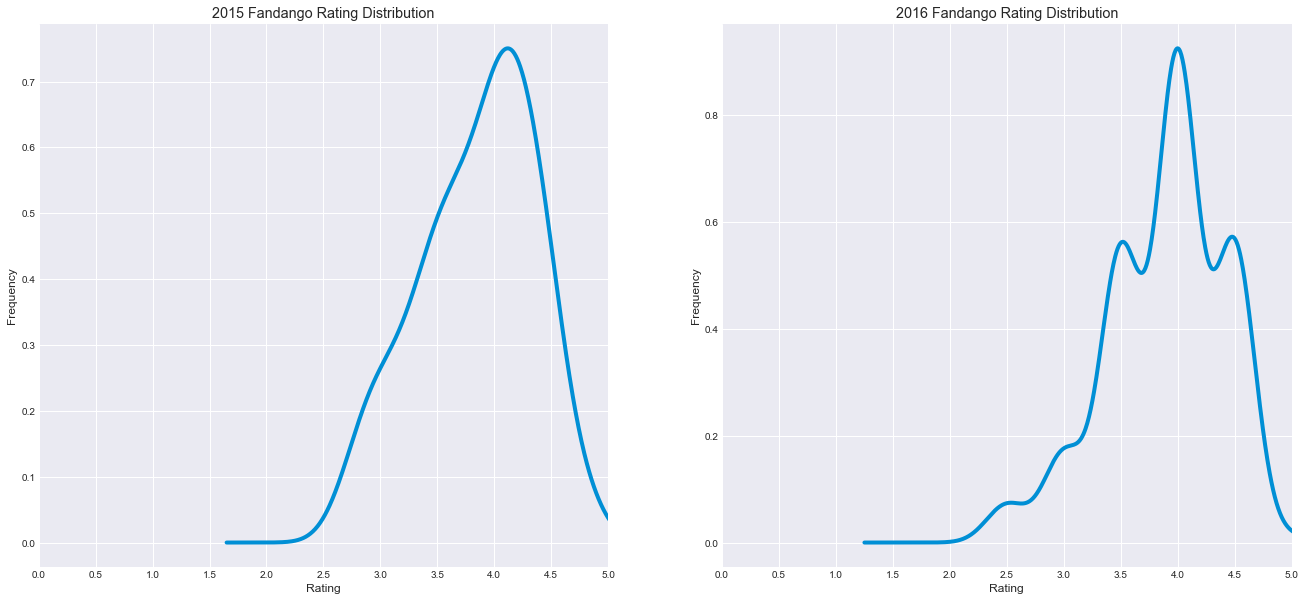

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
fandango_2015['Fandango_Ratingvalue'].plot.kde()
plt.title("2015 Fandango Rating Distribution")
plt.ylabel("Frequency")
plt.xlabel("Rating")
plt.xlim((0,5))
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.subplot(1,2,2)
fandango_2016['fandango'].plot.kde()
plt.title("2016 Fandango Rating Distribution")
plt.ylabel("Frequency")
plt.xlabel("Rating")
plt.xlim((0,5))
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Let's overlay these two graphs to get another visual comparison

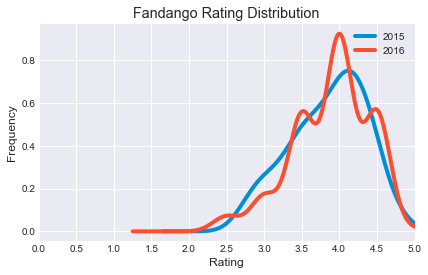

In [196]:
fandango_2015['Fandango_Ratingvalue'].plot.kde()
fandango_2016['fandango'].plot.kde()
plt.title("Fandango Rating Distribution")
plt.style.use("seaborn-darkgrid")
plt.ylabel("Frequency")
plt.xlabel("Rating")
plt.xlim((0,5))
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(["2015", "2016"])
plt.show()

Each KDE plot contains similar distributions. 2015's distribution is more linear whereas 2016's distribution has more variance between the half point and full point values. Generally, speaking there is some difference between the ratings between each years suggesting that there was a change made. If no change occured it is likely we would see a similarly linear path of the distribution of 2016. Although, there does indicate to be a change, the overall direction is similar. 

### Comparing Relative Frequencies
While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

We're going to generate a frequency distribution chart for each dataset.

In [197]:
fandango_2015['Fandango_Ratingvalue'].value_counts().sort_index(ascending=False)

4.8     3
4.6     2
4.5     9
4.4     7
4.3     9
4.2    11
4.1    13
4.0     7
3.9    12
3.8     4
3.7     8
3.6     8
3.5     6
3.4     7
3.3     4
3.2     4
3.1     3
3.0     4
2.9     4
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

In [198]:
fandango_2016['fandango'].value_counts().sort_index(ascending=False)

5.0     1
4.5    47
4.0    77
3.5    46
3.0    14
2.5     6
Name: fandango, dtype: int64

A more granular look at the datasets shows us some stark differences in characteristics of the ratings between the two datasets. The 2015 ratings are not rounded and have significantly more variance. the 2016 values are rounded to the whole or half integer--demonstrating a significant decrease in the variability of the scores. 

Additionally, the 2016 dataset has comparatively more values than the 2015 dataset. From this look it may make more sense to attempt a comparison based on intervals between the two datasets.

In [199]:
interval_range = pd.interval_range(2.5, 5.0, freq=0.5)
interval_range

IntervalIndex([(2.5, 3.0], (3.0, 3.5], (3.5, 4.0], (4.0, 4.5], (4.5, 5.0]],
              closed='right',
              dtype='interval[float64]')

In [200]:
fandango_2015_dft = pd.Series([0]*5, index=interval_range)
for r in fandango_2015['Fandango_Ratingvalue']:
    for i in interval_range:
        if r in i:
            fandango_2015_dft.loc[i] +=1
            
fandango_2015_dft.sort_index(ascending=False)

(4.5, 5.0]     5
(4.0, 4.5]    49
(3.5, 4.0]    39
(3.0, 3.5]    24
(2.5, 3.0]    12
dtype: int64

In [201]:
fandango_2016['fandango'].value_counts().sort_index(ascending=False)

5.0     1
4.5    47
4.0    77
3.5    46
3.0    14
2.5     6
Name: fandango, dtype: int64

After ranging the data to be in a more comparable format, we can observe that the two datasets are similar in their distribution. The one noticable difference is that the values of 2016 peak at a rating of 4.0 and have nearly similar values the the boundary points (3.5 and 4.5). In contrast, the 2015 data set also peaks around 4.0-4.5 range but it's progression increments linearly from the bottom ratings and then drops off significanlty at the 4.5-5.0 range. What becomes more challenging is evaluating these two distributions because the count of the number of ratings is not equal. However on a proportional basis is does appear that they trend similarly although there seems to be more variance between the ratings of the 2016 dataset. 

### Determining the Direction of the Change
Although our comparisons above provided more objective results than the KDE plots, a true comparison between the datsets remains murky. Let's take a closer look at the summary statistic of these two datasets to see the what differences we can identify.

In [202]:
summary_stats_2015 = fandango['Fandango_Ratingvalue'].describe()
summary_stats_2015

count    146.000000
mean       3.845205
std        0.502831
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [203]:
summary_stats_2016 = fandango_2016['fandango'].describe()
summary_stats_2016

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

The above stats are easily compared but we can see we're missing the mode.

In [204]:
mode_2015 = fandango['Fandango_Ratingvalue'].mode()
mode_2016 = fandango_2016['fandango'].mode()

print(mode_2015[0])
mode_2016[0]

4.1


4.0

In [205]:
mean_2015 = summary_stats_2015['mean']
mean_2016 = summary_stats_2016['mean']

median_2015 = summary_stats_2015['50%']
median_2016 = summary_stats_2016['50%']

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015[0]]
summary['2016'] = [mean_2016, median_2016, mode_2016[0]]
summary.index = ['Mean', 'Median', 'Mode']
summary

,2015,2016
Mean,3.845205,3.887435
Median,3.900000,4.000000
Mode,4.100000,4.000000


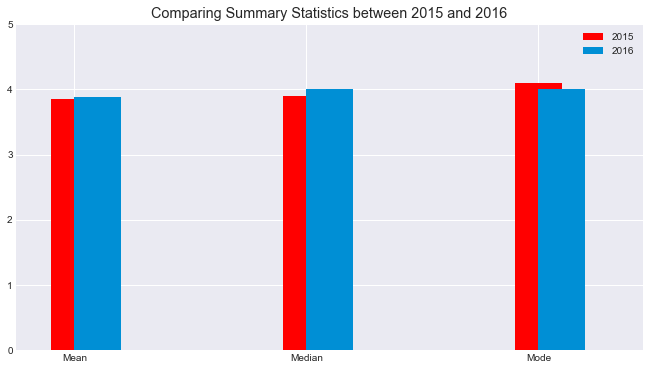

In [206]:
plt.figure(figsize=(10,6))
summary['2015'].plot.bar(color="red", width=.2)
summary['2016'].plot.bar(align="edge", width=.2)
plt.ylim(0.0,5.0)
plt.xticks(rotation="horizontal")
plt.title("Comparing Summary Statistics between 2015 and 2016")
plt.legend()
plt.show()


### Conclusions
In review of the summary comparisons it is obvious that there is ultimately little difference in ratings between the two years. On average movies in 2016 scored a slightly higher rating than they did in 2015. One significant contribution to this result is the fact that there were more movies in the 2016 sample than 2015. 

However, it is worth noting the larger distances recorded between the median and the mode. Both these values played a role in understanding the slight differences in the average rating between the two years.

It is likely that the additional titles contributed to this slight increase in average ratings. This observation is supported by comparisons between the medians. As we can see the median value of 2016 was slightly higher than the median value of 2015 as a result of the additional movies found in the 2016 dataset.

Although 2016 may have had more movies rated, 2015's average ratings were slightly higher. This is corroborated by the difference between the 2015 and 2016 mode. 

We can conclude that although Fandango appeared to address their ratings system it ultimately had little overall effect. 